# Les séries temporelles avec Python (3/4)

>1. Introduction à la manipulation de données temporelles avec Python
>2. Visualisation et opérations sur les séries temporelles
>3. **Éléments théoriques et exemples**
>4. Analyse, modélisation et prédiction

Dans ce troisième article, nous entrons dans le coeur du sujet avec l'introduction d'éléments théoriques sur les séries temporelles et de notions fondamentales pour leur compréhension et leur analyse.

# Éléments théoriques et exemples

Où l'on va découvrir les notions de bases inhérentes à l'analyse des séries temporelles et illustrer ce concept par des "vraies" données.

## Notions de bases

### Définition

Une série temporelle (ou chronologique), est une suite de valeurs numériques représentant l’évolution d’une quantité au cours du temps. On la note généralement $\{y_t\}_{t=1}^{T}$.  
NB: on parle parfois de processus ou processus stochastique qui fait référence au processus, **inconnu et non observable**, qui a entraîné ces observations.

### Les composantes d'une série temporelle

Une série temporelle peut se décomposer en 4 composantes :
- **Tendance** : orientation générale de la série (vers le haut ou vers le bas)
- **Saisonnalité** : tendances hebdomadaires, mensuelles, trismestrielles ou annuelles
- **Cycle** : cycles économiques à long terme, sur plusieurs années
- **Bruit** : ce qui reste après avoir extrait les composants précédents

On verra plus loin comment décomposer une série temporelle.

### La stationnarité

Un processus $\{y_t\}_{t=1}^{T}$ est dit stationnaire lorsque : 
- $E(y_t) = \mu$
- $V(y_t) = \sigma^2$
- $\gamma(t,s) = \gamma(t-s)$ où $\gamma$ est la fonction d'autocorrélation qu'on va découvrir de suite

**DESSIN STYLÉ STATIONNARITÉ**

### L'autocorrélation et l'autocorrélation partielle

L'autocorrélation est la covariance entre deux valeurs d'une même série :
$$\gamma(t,s) = Cov(y_t,y_s) = E[(y_t-\mu_t)(y_s-\mu_s)]$$
Cet indicateur montre comment les observations d'une série temporelle sont liées entre elles.

La **fonction d'autocorrélation (ACF)** et la **fonction d'autocorrélation partielle (PACF)** permettent de mesurer l'association entre des valeurs actuelles et passées. Elles indiquent les valeurs passées les plus corrélées aux valeurs suivantes et donc les plus utiles à la prévision de valeurs futures. Pour parler _"avec les mains"_, la fonction ACF mesure la similitude entre 2 observations en fonction du décalage temporel entre les 2.

Concrètement :
- ACF au décalage k = corrélation entre les valeurs séparées par k intervalles
- PACF au décalage k = corrélation entre les valeurs séparées par k intervalles, compte tenu des valeurs des intervalles intermédiaires

**DESSIN STYLÉ ACF/PACF**

Ces graphiques interviennent dans la détermination de l'ordre des processus d'un modèle ARIMA qu'on va voir bientôt car je suis sûr que vous avez hââââââte.

### Bruit blanc

Un **bruit blanc** est un processus $\{\epsilon_t\}_{t=1}^{T}$ qui vérifie :
>- $E[\epsilon_t] = 0$
>- $E[\epsilon_t^2] = \sigma^2$
>- $E[\epsilon_t\epsilon_s] = 0$ pour $s \neq t$

Un **bruit blanc indépendant** est un processus $\{\epsilon_t\}_{t=1}^{T}$ qui vérifie :
>- $E[\epsilon_t] = 0$
>- $E[\epsilon_t^2] = \sigma^2$
>- $\epsilon_t$ et $\epsilon_s$ indépendants pour $s \neq t$

Un **bruit blanc gaussien** $\{\epsilon_t\}_{t=1}^{T}$ est un bruit blanc indépendant qui suit une loi normale centrée : $\epsilon_t \hookrightarrow \mathcal{N}(0,\sigma^2)$

Intuitivement, un bruit blanc dans le cadre des séries temporelles, c'est la partie purement aléatoire du processus.

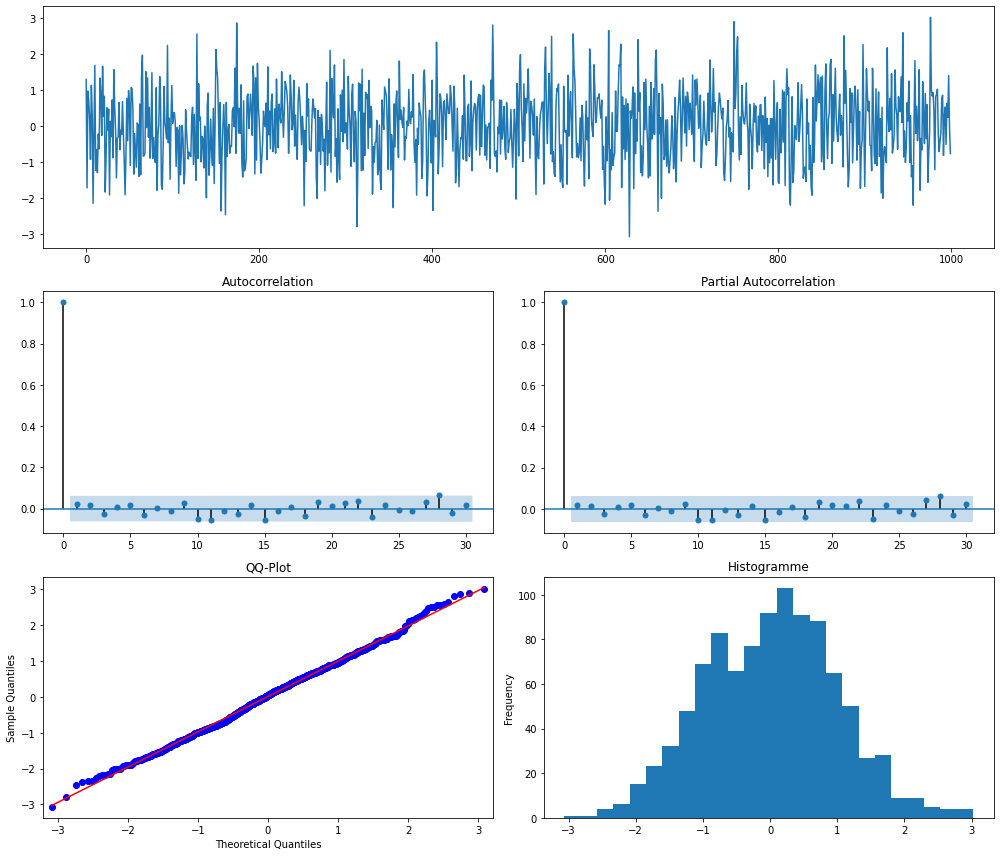

In [1]:
import numpy as np
 
# on génère un bruit blanc gaussien
e = np.random.normal(size=1000)

# on visualise la série avec la fonction définie dans le script fonctions.py
import fonctions as fct
fct.ts_plot(e)

**Interprétation :** les graphiques ci-dessus ressemblent à la structure souhaitée d'une série chronologique d'erreurs :
- pas de pics dans les graphes ACF et PACF 
- le QQ-plot et l'histogramme indiquent un comportement normal

### La marche aléatoire

Un processus de marche aléatoire $\{x_t\}_{t=1}^{T}$ est une série qui vérifie :  
$x_t = x_{t-1} + \epsilon_t$ avec $\epsilon_t$ un bruit blanc

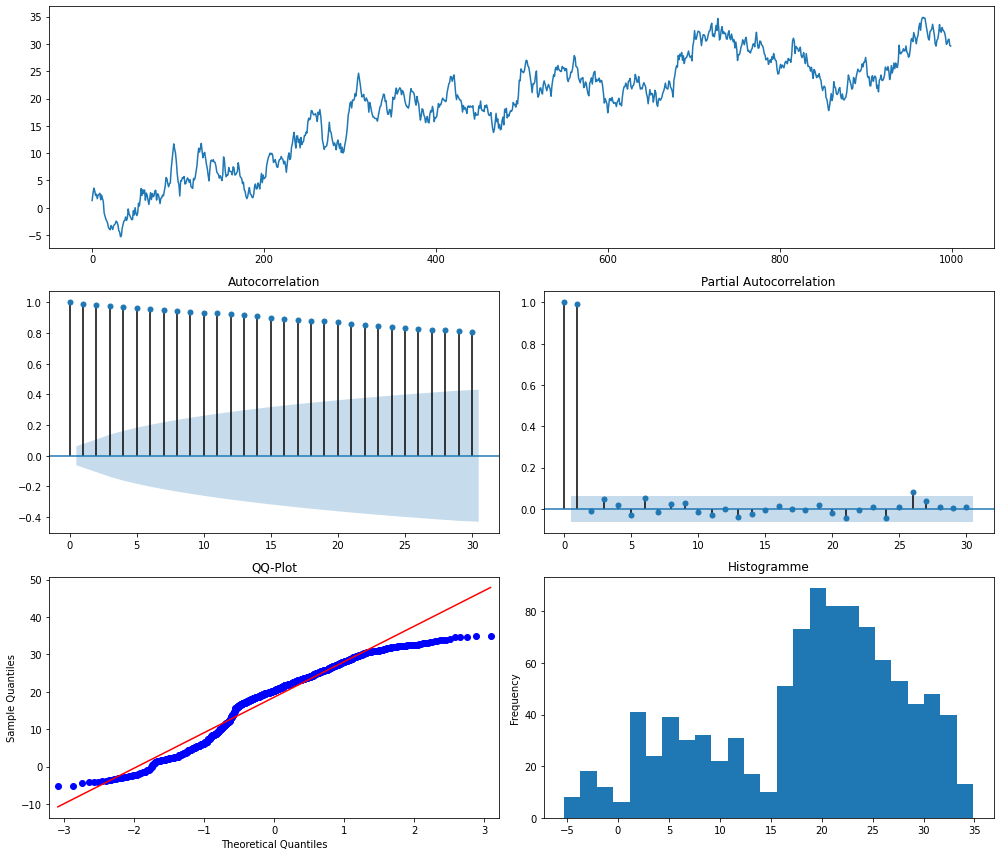

In [2]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
 
#simulation d'une marche aléatoire
for t in range(T):
    x[t] = x[t-1] + e[t]
    
#visualisation
fct.ts_plot(x)

**Interprétation :** on voit la ressemblance entre ce processus de marche aléatoire et les cours d'actifs en bourse qui sont caractérisés par : 
- un ACF élevé pour toute longueur de décalage et un PACF élevé pour le premier décalage uniquement 
- un QQ-plot et un histogramme indiquant que la série n'est pas un bruit blanc

### Modèle autorégressif

Une série temporelle $\{x_t\}_{t=1}^{T}$ qui suit un modèle autorégressif d'ordre $p$ (et noté $AR(p)$) est telle que :  
$x_t = \mu + \Sigma_{i=1}^{p}\phi_i x_{t-i} + \epsilon_t$ avec $\mu$ une constante et $\epsilon_t$ un bruit blanc

Un processus autorégressif d'ordre 1 est donc donné par :
$AR(1)$ : $x_t = \mu + \phi x_{t-1} + \epsilon_t$ 

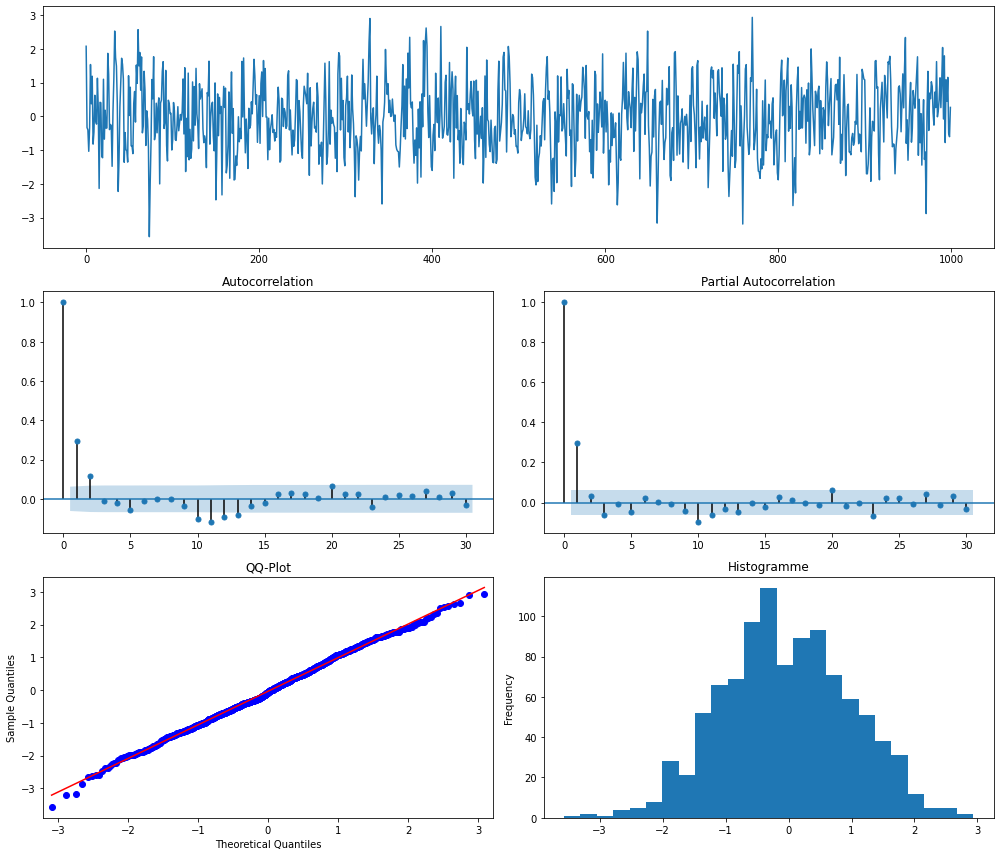

In [3]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi = 0.3
 
#simulation d'un processus AR(1)
for t in range(T):
    x[t] = phi * x[t-1] + e[t]
    
#visualisation
fct.ts_plot(x)

**Interprétation :**
- pour un processus AR(1) avec $\phi=0.3$,on voit sur les graphiques ACF et PACF, un pic au premier décalage qui tend de suite vers 0
- l'histogramme et le QQ-plot indiquent des résidus presque aléatoires.

*Remarque pas anodine* : la marche aléatoire introduite précédemment est un processus AR(1), et il n'est pas stationnaire. Par contre, la série différenciée $(x_t - x_{t-1})$ est stationnaire. La stationnarité d'un processus $AR(1)$ dépend de si $|\phi|<1$. On peut généraliser cette propriété aux processus $AR(p)$.

### Modèle moyenne mobile

Le modèle de moyenne mobile d'ordre $q$ noté $MA(q)$ suppose que la série temporelle observée peut être représentée par une combinaison linéaire de termes d'erreur de bruit blanc. Cela s'écrit donc :  
$x_t = \epsilon_t + \Sigma_{i=1}^{q}\theta_i\epsilon_{t-i}$ avec $\epsilon_t$ un bruit blanc

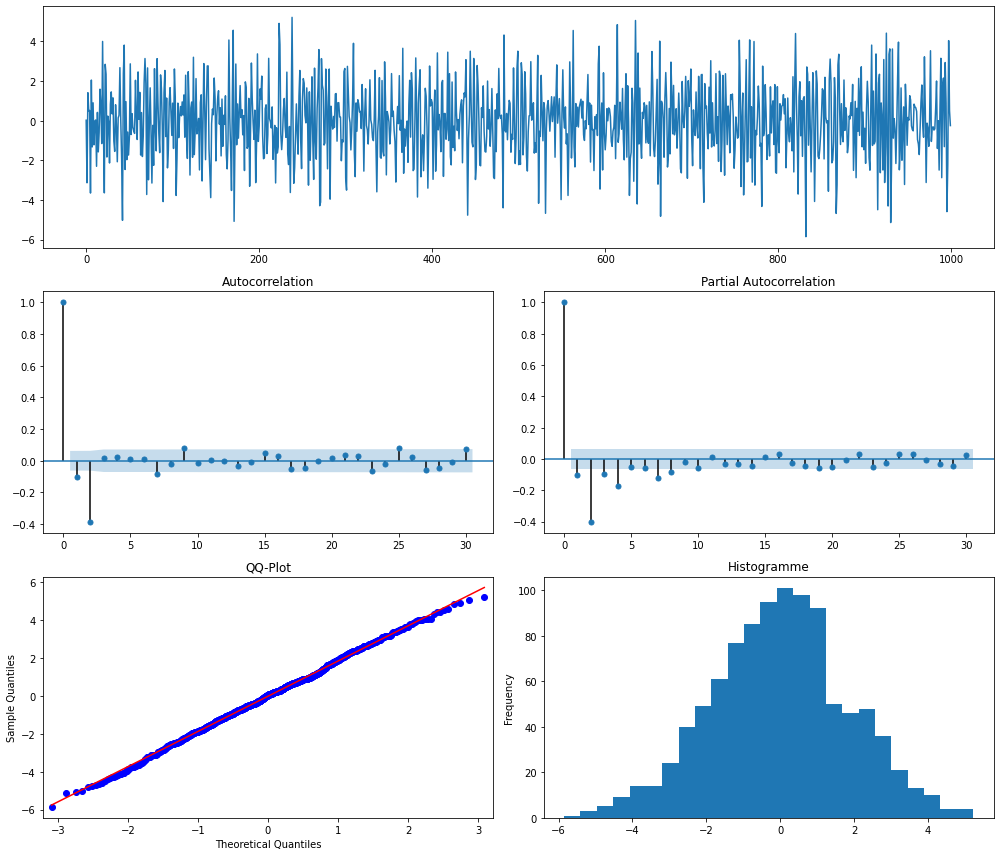

In [4]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
theta1 = 0.8
theta2 = -1.4
 
# simulation d'un modèle MA(2)
for t in range(T):
    x[t] = e[t] + theta1 * e[t-1] + theta2 * e[t-2]

#visualisation
fct.ts_plot(x)

**Interprétation :** pour le processus $MA(2)$ avec les paramètres choisis, on voit un pic plus important pour le deuxième décalage dans les tracés ACF et PACF. 
On peut observer également que le pic dans le graphique PACF ne décroît pas immédiatement mais prend quelques périodes pour se "désintégrer".

*Remarque toujours pas anodine* : un processus $MA(q)$ est toujours stationnaire.

### Modèle autorégressif et moyenne mobile

Un processus $ARMA(p,q)$ est une combinaison des deux modèles précédents et s'écrit donc :  
$x_t = \epsilon_t + \Sigma_{i=1}^{p}\phi_i x_{t-i} + \Sigma_{i=1}^{q}\theta_i\epsilon_{t-i}$ avec $\epsilon_t$ un bruit blanc

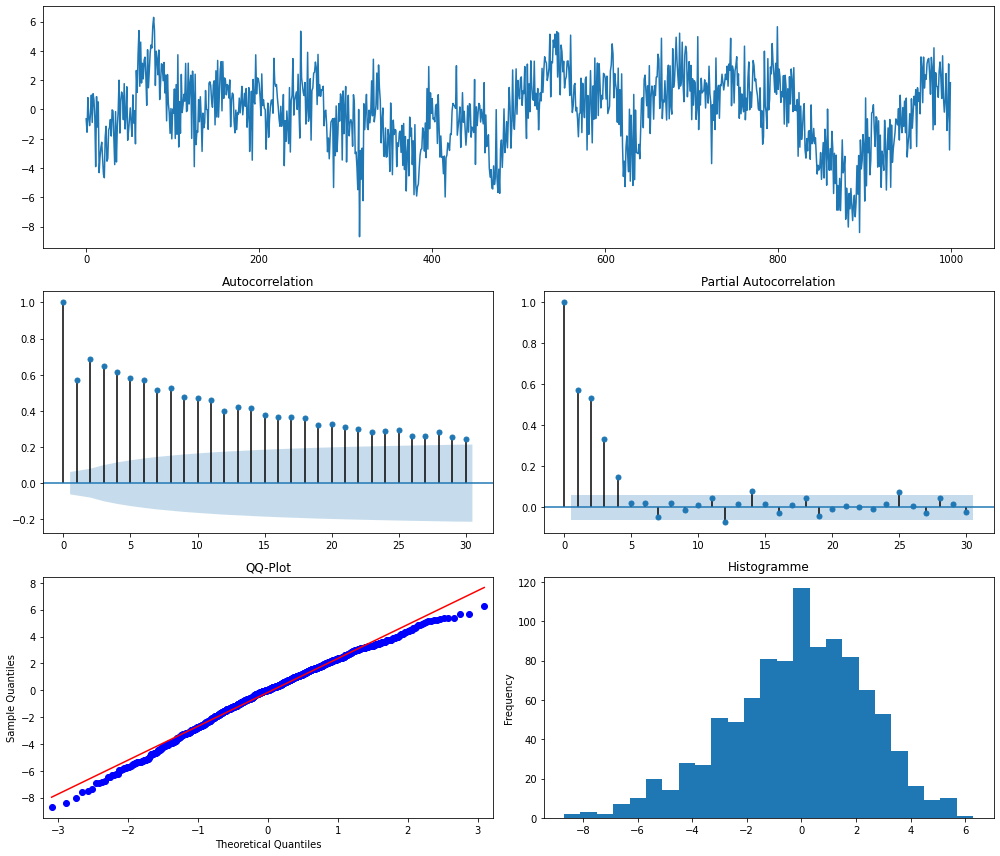

In [5]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi1 = 0.3
phi2 = 0.6
theta1 = 0.8
theta2 = -1.1
theta3 = 0.5

# simulation d'un modèle ARMA(2,3)
for t in range(T):
    x[t] = e[t] + phi1 * x[t-1] + phi2 * x[t-2] + theta1 * e[t-1] + theta2 * e[t-2] + theta3 * e[t-3]

#visualisation
fct.ts_plot(x)

**Interprétation :** on voit clairement que la série n'est pas stationnaire et donc on n'ira pas beaucoup plus loin pour l'interprétation...

## Des exemples de séries temporelles

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Importer, afficher et commenter les séries temporelles :
- "sunspot" : nombre annuel de tâches solaires de 1790 à 1970
- "uspop" : population des Etats-Unis, en millions, de 1790 à 1990 (fréquence décennal)
- "beer" : production mensuelle de bière en Australie, en mégalitres, de janvier 1956 à aout 1995
- "lynx" : nombre annuel de lynx capturés au Canada, de 1821 à 1934

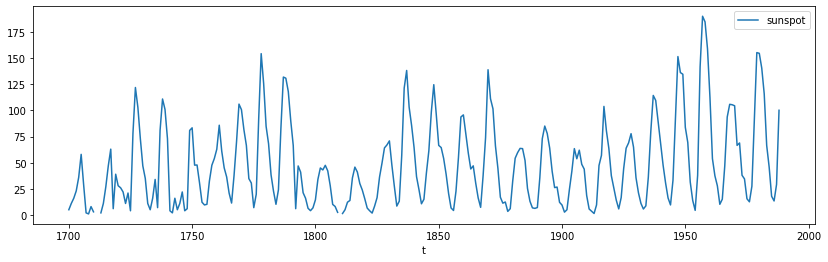

In [7]:
sunspot = pd.read_csv("data/sunspot.csv", index_col="t")
sunspot.plot(y="sunspot", figsize=(14,4));
#fct.ts_plot(sunspot["sunspot"])

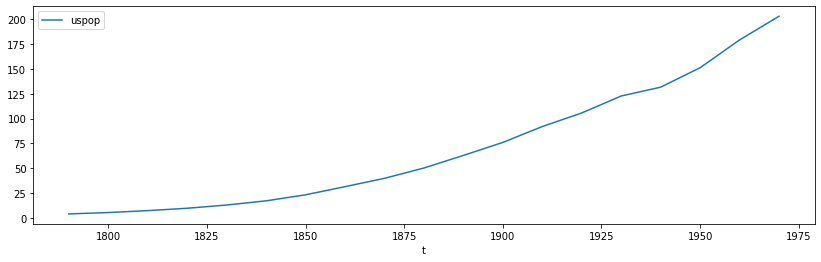

In [8]:
uspop = pd.read_csv("data/uspop.csv", index_col="t")
uspop.plot(y="uspop", figsize=(14,4));
#fct.ts_plot(uspop["uspop"])

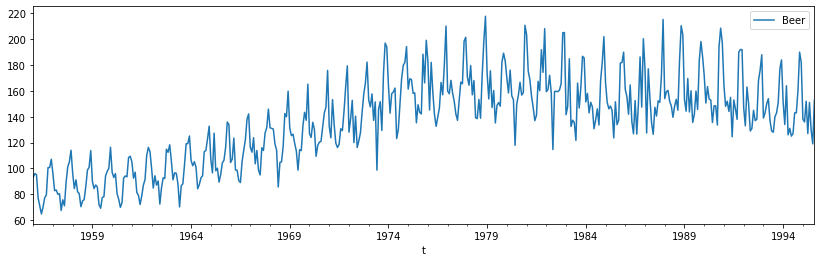

In [9]:
beer = pd.read_csv("data/beer.csv", header=None, names=["t", "Beer"], parse_dates=True, dayfirst=True, index_col="t")
beer.plot(y="Beer", figsize=(14,4));
#fct.ts_plot(beer["Beer"])

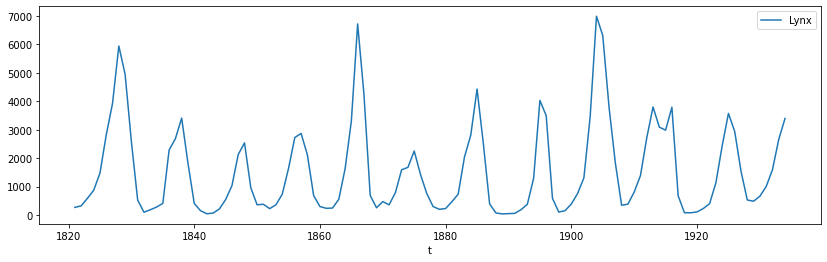

In [10]:
lynx = pd.read_csv("data/lynx.csv", index_col="t")
lynx.plot(y="Lynx", figsize=(14,4));
#fct.ts_plot(beer["Beer"])